# Gradient Shows Direction of Steepest Ascent

The gradient of a function "points" towards the direction at which the function increases the most. 

To see how everything works, consider a function $f(\vec{x})$ (with $\vec{x}$ and $N$-dimensional vector) evaluated at some $\vec{x} ^\prime =\vec{x} + \delta \vec{x}$ (with $\delta \vec{x}$ small). Then, we can write

$$
f(\vec{x} + \delta \vec{x}) =  f(\vec{x}) + \delta \vec{x} \cdot \vec\nabla f(\vec{x})  + \dots 
$$
with $\vec\nabla f(\vec{x}) \equiv \dfrac{\partial f(y_1,y_2,\dots,N)}{\partial y_i}\Big|_{\vec{y}=\vec{x}}$.


It becomes clear at this point that $f(\vec{x})$ becomes maximally increased when $\delta \vec{x}$ is parallel to $ \vec\nabla f(\vec{x})$, i.e. for $\vec{x}^\prime = \vec{x} + \alpha \ \vec\nabla f(\vec{x})$ (with some $\alpha >0$). Also, $f(\vec{x})$ is maximally decreased for  $\vec{x}^\prime = \vec{x} - \alpha \ \vec\nabla f(\vec{x})$ (with some $\alpha >0$).

One can easily understand this in the case $N=1,2,3$ as we can simply draw vectors and see what happens, but you can see <a href="#1">footnote <sup>1</sup></a> for a general proof. 


### Gradient Acsent/Descent
We would like to maximize or minimize $f(\vec{x})$. To do this, we can exploit the previous observation by starting at some point $\vec{x}$ and iteratively update $\vec{x} \to \vec{x} \pm \alpha \ \vec\nabla f(\vec{x})$, until maximization ($+$) or minimization ($-$) occurs (say if $\vec\nabla f(\vec{x})$ becomes very small).  

The Gradient Acsent/Descent algorithm is maybe the simplest optimization algorith, as the only thing that needs is the derivative of the function. However, stopping conditions and local minima/maxima are a huge problem.
 
 
 
 
 
 
 <br>
 <br>
 <br>
 <br>
 <br>
 
 
---
<p id="#1" style="font-size:8pt" ><sup>1</sup>
Basically, this statement comes from the fact that for two $R^N$ vectors, $\vec{a},\vec{b}$, it holds that $|\vec{a}\cdot \vec{b}| \leq ||\vec{a}||||\vec{b}||$. Here is the proof:
<br>
We start by defining the inner product as $$\vec{a}\cdot \vec{b} \equiv \displaystyle\sum_i a_i b_i.$$ Therefore, $$\vec{a}\cdot \vec{a} = || \vec a ||^2 \geq 0.$$
<br>
With these definitions, we write
$$
\Big|\Big|\vec{x} - \dfrac{\vec{x}\cdot \vec{y}}{||\vec{y}||^2}\vec{y} \Big|\Big|^2 \geq 0 
\Rightarrow 
||\vec{x}||^2 + \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} -2 \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} \geq 0 
\Rightarrow \\
||\vec{x}||^2 - \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} \geq 0 
\Rightarrow
(\vec{x}\cdot \vec{y})^2 \leq ||\vec{x}||^2 ||\vec{y}||^2 
\Rightarrow \\
|\vec{x}\cdot \vec{y}| \leq ||\vec{x}|| ||\vec{y}|| \;.
$$
<br>
Note also that this generalizes trivially to $C^N$ spaces to $\langle y|x \rangle \leq ||\vec{x}|| ||\vec{y}||$, with  $\langle y|x \rangle \displaystyle \sum_i y^{*}_i x_i$.
</p>

# AdaDelta


One of the things that can make GD unable to converge, is the learning rate, which has to be tunned. This can be avoided by using *AdaDelta* [[1212.5701](https://arxiv.org/abs/1212.5701)] that tries to adjust the learning as the algorithm proceeds. 

The update of $\vec{x}$, according to this is: 

$$
\vec{x}^{(t)} = \vec{x}^{(t-1)} - \delta \vec{x}^{(t)}  \;,
$$
with
$$
\delta \vec{x}^{(t)} = \dfrac{\sqrt{ \mathbb{E}[\delta \vec{x}^2]^{(t-1)} + \epsilon}  }{\sqrt{ \mathbb{E}[g^2]^{(t)} + \epsilon}} {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \;, 
$$
where the *decaying averages* are
$$
\mathbb{E}[\delta \vec{x}^2]^{(t)} \equiv \gamma \ \mathbb{E}[\delta \vec{x}^2]^{(t-1)} +
(1-\gamma) \ \left( \delta \vec{x}^{(t)} \right)^2 \;, 
\\
\mathbb{E}[g^2]^{(t)} \equiv \gamma \ \mathbb{E}[g^2]^{(t-1)} +
(1-\gamma) \ \left( {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \right) \cdot \left( {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \right)\;, 
$$
for $\mathbb{E}[X]^{(0)} = 0$. 

The parameters $\gamma$ and $\epsilon$ are free, but generally $\gamma \approx 1$ and $\epsilon \ll 1$. Common choice is $\gamma \approx 0.95$ and $\epsilon \ll 10^{-6}$.

### The algorithm

With these definitions, the AdaDelta algorithm is:

1. Initialize $\mathbb{E}[g^2]^{(0)} =0$ and $\mathbb{E}[\delta \vec{x}^2]^{(0)}=0$
1. Loop t=1,2,...  until some condition is satisfied
    1. Calculate ${\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)})$
    1. Accumulate $\mathbb{E}[g^2]^{(t)}$
    1. Calculate $\delta \vec{x}^{t} = \dfrac{\sqrt{ \mathbb{E}[\delta \vec{x}^2]^{(t-1)} + 
    \epsilon}  }{\sqrt{ \mathbb{E}[g^2]^{(t)} + \epsilon}} {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)})$
    1. Accumulate $\mathbb{E}[\delta \vec{x}^2]^{(t)}$
    1. Update $\vec{x}^{(t+1)} = \vec{x}^{(t)} - \delta \vec{x}^{(t)}$  
1. Done

---

## RMSprop

There is a variant of AdaDelta called *RMSprop*, which uses
$$
\delta \vec{x}^{(t)} = \dfrac{\alpha}{\sqrt{ \mathbb{E}[g^2]^{(t)} + \epsilon}} {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \;, 
$$
with $\alpha \ll 1$ some constant (typically $\alpha  =10^{-3}$).


Lets make a Gradient Descent minimizer class to see how it works (maximization quite trivial once you get how it works).

In [1]:
import numpy as np


import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

This is how the target should look like

In [2]:
class modelBase:
    '''
    This is how the function should look like.
    The key point is to have way to update the parameters w.
    '''
    def __init__(self,dimensions,w0):
        '''
        func: the function that depends on parameters w
        dfdw_i: the derivative wrt w_i (see self.derivative_w to see how it should be defined).
        dimensions:list  [inpunt_dim,output_dim]
        w0: initial values of w
        '''
    
        self.w=w0
        self.dim=len(w0)
        
        self.dimensions=dimensions
        
        self.signal=[0 for i in range(dimensions[1])] #will store the output of self.f
        self.dsdw=[0 for i in range(dimensions[1])] #will store the output of self.dfdw_i
        
        #will store the input, to avoid passing the input every time we callthe function or its derivetive
        self.input=[0 for i in range(dimensions[1])]
    
    def setInput(self,x):
        '''set the input'''
        self.input=x

    def __call__(self):
        pass
    
    def derivative_w(self,i):
        pass

In [3]:
class lossFunc:
    '''
    This is how the loss function should look like.
    We use a class, in order to encapsulate the gradient within the same object.
    '''
    def __init__(self,data_in,data_out,Q_i,dQds_i,model):
        '''
        data_in, data_out: the input, output data to be used in order to minimize the loss
        
        Q: the loss function in one domension. It will be averaged over all dimensions in __call__
        dQds_i: the derivative of the loss function wrt to s_i (the i^th signal)
        
        model: instance of modelFunc 
        '''
        self.data_in=data_in
        self.data_out=data_out
        self.data_size=len(self.data_in)
        
        self.Q_i=Q_i
        self.dQds_i=dQds_i
        self.model=model
        
        self.dim=len(self.model.w)#dimension of w
        self.N=model.dimensions[1]#dimension of model.signal
        self.dQdw=0 #this will hold dQdw
        
        #we need this to hold the average gadient over all data points
        self.grad=[0 for _ in range(self.dim)]

        
        
    def __call__(self,target):
        sum_Q=0;
         
        for r in range(self.N):
            sum_Q+=self.Q_i(self.model.signal[r],target[r])
    
        sum_Q=sum_Q/(float(self.N))

        return sum_Q
    
    

    def averageGrad(self):
        #get the average gradient over all data
        for index in range(self.data_size):
            t=self.data_out[index]
            self.model.setInput(self.data_in[index])
            self.model()

            for i in range(self.dim):
                self.model.derivative_w(i)
                self.dQdw=0

                for r in range(self.N):
                    tmp_dQds=self.dQds_i(self.model.signal[r], t[r])/(float(self.N))
                    self.dQdw += tmp_dQds*self.model.dsdw[r]

                self.grad[i]+=self.dQdw/self.data_size


In [4]:
class GradientDescent:
    
    def __init__(self,loss):
        '''
        loss: the loss function
        '''
        
        self.Q=loss
    
        
        self.steps=[]
        self.steps.append(self.Q.model.w[:])
        self.dim=self.Q.model.dim
    
    def update(self):
        pass
    
    def run(self,abs_tol=1e-5, rel_tol=1e-3, step_break=100,max_step=5000):
        '''        
        abs_tol, rel_tol, step_break: stop when _check<1 (_check is what update should return) 
        for step_break consecutive steps
        
        max_step: maximum number of steps
        '''
        _s=0
        count_steps=1
        while count_steps<=max_step:
            _check=self.update(abs_tol, rel_tol)
            
            count_steps+=1             
                
            
            if _check<1:
                _s+=1
            else:
                _s=0
            
            if _s>step_break:
                break

        return self.Q.model.w[:]

In [5]:
class VanillaGD(GradientDescent):
    def __init__(self,loss,alpha=1e-2):
        '''
        loss: the loss function
        alpha: the learning rate
        '''
        GradientDescent.__init__(self,loss)
        self.alpha=alpha

    def update(self,abs_tol=1e-5, rel_tol=1e-3):
        '''
        update should return a number that when it is smaller than 1
        the main loop stops. Here I choose this number to be:
        sqrt(1/dim*sum_{i=0}^{dim}(grad/(abs_tol+x*rel_tol))_i^2)
        '''
        
        _w2=0
        _check=0
                
        self.Q.averageGrad()
        
        for i in range(self.dim):
            dw=self.alpha*self.Q.grad[i]
            self.Q.model.w[i]=self.Q.model.w[i]-dw

            _w2=abs_tol + self.Q.model.w[i] * rel_tol
            _check+=(dw/_w2)*(dw/_w2)
            
            self.Q.grad[i]=0

        _check=np.sqrt(1./self.dim *_check)

        self.steps.append(self.Q.model.w[:])
        
        
        return _check

In [6]:
class RMSpropGD(GradientDescent):
    '''Implementation of RMSprop.'''

    def __init__(self,loss,gamma=0.95,epsilon=1e-6,alpha=1e-3):
        '''
        loss: the loss function
        gamma: the decaying parameter
        epsilon: safety parameter (to avoid division by 0)
        alpha: learning rate
        '''
        
        GradientDescent.__init__(self,loss)

        self.gamma=gamma
        self.epsilon=epsilon
        self.alpha=alpha
        
        # counters for the decaying means of the gradient and dw         
        self.gE=[0 for _ in self.Q.model.w]

    def update(self,abs_tol=1e-5, rel_tol=1e-3):
        '''
        update should return a number that when it is smaller than 1
        the main loop stops. Here I choose this number to be:
        sqrt(1/dim*sum_{i=0}^{dim}(grad/(abs_tol+x*rel_tol))_i^2)
        '''
        _w2=0
        _check=0
        
        self.Q.averageGrad()

        for i in range(self.dim):
            self.gE[i]=self.gamma*self.gE[i] + (1-self.gamma)*self.Q.grad[i]**2 
            dw=self.alpha/np.sqrt( (self.gE[i]+self.epsilon)  )*self.Q.grad[i]
            
            self.Q.model.w[i]=self.Q.model.w[i]-dw

            _w2=abs_tol + self.Q.model.w[i] * rel_tol
            _check+=(dw/_w2)*(dw/_w2)
            self.Q.grad[i]=0

        _check=np.sqrt(1./self.dim *_check)

        self.steps.append(self.Q.model.w[:])
 
        return _check

In [7]:
class AdaDeltaGD(GradientDescent):
    '''Implementation of AdaDelta.'''
    
    def __init__(self,loss,gamma=0.95,epsilon=1e-6,alpha=1):
        '''
        loss: the loss function
        gamma: the decaying parameter
        epsilon: safety parameter (to avoid division by 0)
        '''
        GradientDescent.__init__(self,loss)
        
        self.gamma=gamma
        self.epsilon=epsilon
        self.alpha=alpha
        
        # counters for the decaying means of the gradient and dw         
        self.gE=[0 for _ in self.Q.model.w]
        self.dwE=[0 for _ in self.Q.model.w]

    def update(self,abs_tol=1e-5, rel_tol=1e-3):
        '''
        update should return a number that when it is smaller than 1
        the main loop stops. Here I choose this number to be:
        sqrt(1/dim*sum_{i=0}^{dim}(grad/(abs_tol+x*rel_tol))_i^2)
        '''
        _w2=0
        _check=0
        
        self.Q.averageGrad()
        
        for i in range(self.dim):
            
            self.gE[i]=self.gamma*self.gE[i] + (1-self.gamma)*self.Q.grad[i]**2 
            dw=np.sqrt( (self.dwE[i]+self.epsilon)/(self.gE[i]+self.epsilon)  )*self.Q.grad[i]*self.alpha
            
            self.dwE[i]=self.gamma*self.dwE[i] + (1-self.gamma)*dw**2
            
            self.Q.model.w[i]=self.Q.model.w[i] - dw
            
            
            _w2=abs_tol + self.Q.model.w[i] * rel_tol
            _check+=(dw/_w2)*(dw/_w2)
            self.Q.grad[i]=0

        _check=np.sqrt(1./self.dim *_check)
        
        self.steps.append(self.Q.model.w[:])
        
        return _check


# Example

Lets find $w_1$ and $w_2$ for $f(x) = x w_1+ w_2$ that fit with data taken from $t=2*x+3$.

Obviously the answer is $w_1 = 2$ and $w_2 = 3$.

In [8]:
data_in=[]
data_out=[]
xmin=-5
xmax=2
for i in range(500):
    x=np.random.rand()*(xmax-xmin)+xmin
    
    data_in.append( [x])
    data_out.append( [2*x+3])


In [9]:
class modelFunc(modelBase):
    def __init__(self,dimensions,w0):
        modelBase.__init__(self,dimensions,w0)
        
        
    def __call__(self):
        self.signal[0]=self.input[0]*self.w[0]+ self.w[1]
        
        
    def derivative_w(self,i):
        if i==0:
            self.dsdw[0]=self.input[0]
        if i==1:
            self.dsdw[0]=1

In [10]:
#the squared error and its derivative
def Q_i(signal, target):
    return (signal-target)**2


def dQds_i(signal, target):
    return 2*(signal-target)

        
#declare the instances
model=modelFunc([1,1],[1,0.2])
Q=lossFunc(data_in,data_out,Q_i,dQds_i,model)

In [11]:
GD=VanillaGD(Q ,alpha=1e-2)
# GD=RMSpropGD(Q ,gamma=1-1e-2,epsilon=1e-5,alpha=1e-2)
# GD=AdaDeltaGD(Q ,gamma=0.99,epsilon=1e-5,alpha=1)

In [12]:
GD.run(abs_tol=1e-4, rel_tol=1e-4, step_break=250,max_step=5000),len(GD.steps)

([1.9995320474562783, 2.998161945195526], 589)

<IPython.core.display.Javascript object>


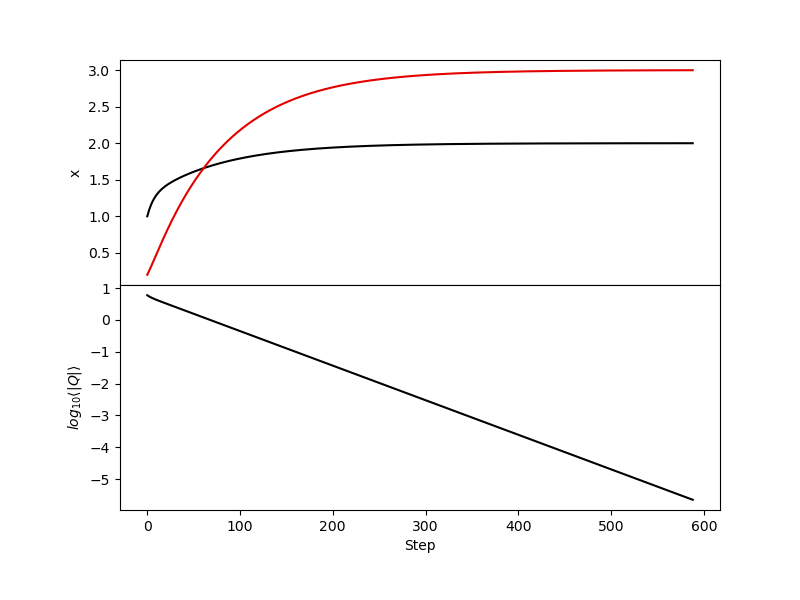

In [13]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)
sub.plot(np.array(GD.steps)[:,0],c='xkcd:black')
sub.plot(np.array(GD.steps)[:,1],c='xkcd:red')

sub.set_ylabel('x')
# sub.set_xscale('log')
sub.set_yscale('linear')


sub = fig.add_subplot(212)
meanQ=[]
steps=[]
_s=0
_r=len(data_in)
for w in GD.steps:
    model.w=w
    mQ=0
    for i in range(_r): 
        model.setInput(data_in[i])
        model()
        mQ+= Q(data_out[i]) 
    if mQ==0:
        mQ=1e-50
    meanQ.append(np.log10(mQ/_r))
    steps.append(_s)
    _s+=1
    
sub.plot(steps,meanQ,c='xkcd:black')

sub.set_ylabel(r'$log_{10} \langle |Q| \rangle $')

# sub.set_xscale('log')
sub.set_yscale('linear')

sub.set_xlabel('Step')

plt.show()